In [ ]:
%%bash
pip3 install deep_phonemizer

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for deep_phonemizer: filename=deep_phonemizer-0.0.19-py3-none-any.whl size=33272 sha256=7254bd0e8693c248af18744af4f72b84e4f1cc8b89909b2ac8322f7951bce011
  Stored in directory: /root/.cache/pip/wheels/b9/d7/45/f2ae07184a29327b2a7f93b1f734a936c3a34e57225fca603b
Successfully built deep_phonemizer


In [ ]:
import torch
import torchaudio

torch.random.manual_seed(0)
device = "cuda" if torch.cuda.is_available() else "cpu"

print(torch.__version__)
print(torchaudio.__version__)
print(device)

2.8.0+cu126
2.8.0+cu126
cuda


In [ ]:
import IPython
import matplotlib.pyplot as plt

In [ ]:
symbols = "_-!'(),.:;? abcdefghijklmnopqrstuvwxyz"
look_up = {s: i for i, s in enumerate(symbols)}
symbols = set(symbols)


def text_to_sequence(text):
    text = text.lower()
    return [look_up[s] for s in text if s in symbols]


text = "Hello. My name is Taehwan Koo. I am University student, majoring Computer Science."
print(text_to_sequence(text))

[19, 16, 23, 23, 26, 7, 11, 24, 36, 11, 25, 12, 24, 16, 11, 20, 30, 11, 31, 12, 16, 19, 34, 12, 25, 11, 22, 26, 26, 7, 11, 20, 11, 12, 24, 11, 32, 25, 20, 33, 16, 29, 30, 20, 31, 36, 11, 30, 31, 32, 15, 16, 25, 31, 6, 11, 24, 12, 21, 26, 29, 20, 25, 18, 11, 14, 26, 24, 27, 32, 31, 16, 29, 11, 30, 14, 20, 16, 25, 14, 16, 7]


In [ ]:
processor = torchaudio.pipelines.TACOTRON2_WAVERNN_CHAR_LJSPEECH.get_text_processor()

text = "Hello. My name is Taehwan Koo. I am University student, majoring Computer Science."
processed, lengths = processor(text)

print(processed)
print(lengths)

tensor([[19, 16, 23, 23, 26,  7, 11, 24, 36, 11, 25, 12, 24, 16, 11, 20, 30, 11,
         31, 12, 16, 19, 34, 12, 25, 11, 22, 26, 26,  7, 11, 20, 11, 12, 24, 11,
         32, 25, 20, 33, 16, 29, 30, 20, 31, 36, 11, 30, 31, 32, 15, 16, 25, 31,
          6, 11, 24, 12, 21, 26, 29, 20, 25, 18, 11, 14, 26, 24, 27, 32, 31, 16,
         29, 11, 30, 14, 20, 16, 25, 14, 16,  7]])
tensor([82], dtype=torch.int32)


In [ ]:
print([processor.tokens[i] for i in processed[0, : lengths[0]]])

['h', 'e', 'l', 'l', 'o', '.', ' ', 'm', 'y', ' ', 'n', 'a', 'm', 'e', ' ', 'i', 's', ' ', 't', 'a', 'e', 'h', 'w', 'a', 'n', ' ', 'k', 'o', 'o', '.', ' ', 'i', ' ', 'a', 'm', ' ', 'u', 'n', 'i', 'v', 'e', 'r', 's', 'i', 't', 'y', ' ', 's', 't', 'u', 'd', 'e', 'n', 't', ',', ' ', 'm', 'a', 'j', 'o', 'r', 'i', 'n', 'g', ' ', 'c', 'o', 'm', 'p', 'u', 't', 'e', 'r', ' ', 's', 'c', 'i', 'e', 'n', 'c', 'e', '.']


Phoneme-based encoding

In [ ]:
bundle = torchaudio.pipelines.TACOTRON2_WAVERNN_PHONE_LJSPEECH

processor = bundle.get_text_processor()

text = "Hello. My name is Taehwan Koo. I am University student, majoring Computer Science."
with torch.inference_mode():
    processed, lengths = processor(text)

print(processed)
print(lengths)

100%|██████████| 63.6M/63.6M [00:00<00:00, 104MB/s]
/usr/local/lib/python3.12/dist-packages/torch/nn/modules/transformer.py:392: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


tensor([[54, 20, 65, 69,  7, 11, 66, 32, 11, 67, 48, 66, 11, 55, 94, 11, 81, 16,
         92, 20, 67, 11, 64, 87,  7, 11, 32, 11, 16, 66, 11, 93, 87, 67, 20, 91,
         44, 79, 20, 81, 59, 11, 79, 81, 87, 38, 20, 67, 81,  6, 11, 66, 48, 63,
         44, 55, 68, 11, 64, 20, 66, 77, 93, 87, 81, 44, 11, 79, 32, 20, 67, 79,
          7]])
tensor([73], dtype=torch.int32)


In [ ]:
print([processor.tokens[i] for i in processed[0, : lengths[0]]])

['HH', 'AH', 'L', 'OW', '.', ' ', 'M', 'AY', ' ', 'N', 'EY', 'M', ' ', 'IH', 'Z', ' ', 'T', 'AE', 'W', 'AH', 'N', ' ', 'K', 'UW', '.', ' ', 'AY', ' ', 'AE', 'M', ' ', 'Y', 'UW', 'N', 'AH', 'V', 'ER', 'S', 'AH', 'T', 'IY', ' ', 'S', 'T', 'UW', 'D', 'AH', 'N', 'T', ',', ' ', 'M', 'EY', 'JH', 'ER', 'IH', 'NG', ' ', 'K', 'AH', 'M', 'P', 'Y', 'UW', 'T', 'ER', ' ', 'S', 'AY', 'AH', 'N', 'S', '.']


/usr/local/lib/python3.12/dist-packages/torch/nn/modules/transformer.py:392: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Downloading: "https://download.pytorch.org/torchaudio/models/tacotron2_english_phonemes_1500_epochs_wavernn_ljspeech.pth" to /root/.cache/torch/hub/checkpoints/tacotron2_english_phonemes_1500_epochs_wavernn_ljspeech.pth


100%|██████████| 107M/107M [00:00<00:00, 318MB/s] 


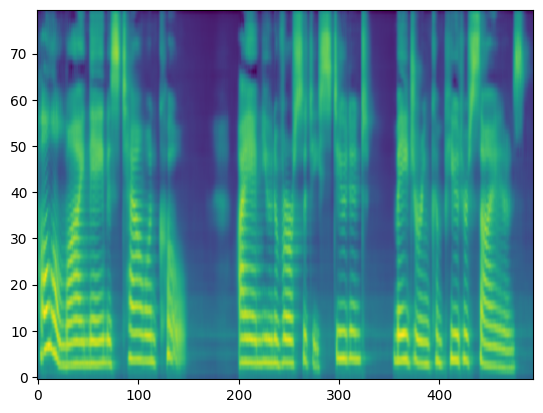

In [ ]:
bundle = torchaudio.pipelines.TACOTRON2_WAVERNN_PHONE_LJSPEECH
processor = bundle.get_text_processor()
tacotron2 = bundle.get_tacotron2().to(device)

text = "Hello. My name is Taehwan Koo. I am University student, majoring Computer Science."

with torch.inference_mode():
    processed, lengths = processor(text)
    processed = processed.to(device)
    lengths = lengths.to(device)
    spec, _, _ = tacotron2.infer(processed, lengths)


_ = plt.imshow(spec[0].cpu().detach(), origin="lower", aspect="auto")

torch.Size([80, 508])
torch.Size([80, 544])
torch.Size([80, 535])


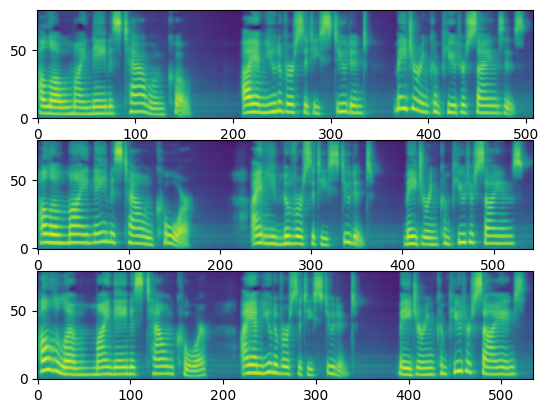

In [ ]:
def plot():
    fig, ax = plt.subplots(3, 1)
    for i in range(3):
        with torch.inference_mode():
            spec, spec_lengths, _ = tacotron2.infer(processed, lengths)
        print(spec[0].shape)
        ax[i].imshow(spec[0].cpu().detach(), origin="lower", aspect="auto")


plot()

Waveform Generation

WaveRNN Vocoder

In [20]:
# Use character-based version instead of phone-based for waveform generation
bundle = torchaudio.pipelines.TACOTRON2_WAVERNN_CHAR_LJSPEECH  # CHAR instead of PHONE

processor = bundle.get_text_processor()
tacotron2 = bundle.get_tacotron2().to(device)
vocoder = bundle.get_vocoder().to(device)

text = "Hello. My name is Taehwan Koo. I am University student, majoring Computer Science."

with torch.inference_mode():
    processed, lengths = processor(text)
    processed = processed.to(device)
    lengths = lengths.to(device)
    spec, spec_lengths, _ = tacotron2.infer(processed, lengths)
    waveforms, lengths = vocoder(spec, spec_lengths)

print(f"✓ Generated waveform shape: {waveforms.shape}")
print(f"✓ Waveform lengths: {lengths}")
print(f"✓ Text: '{text}'")

# Use vocoder.sample_rate instead of bundle.sample_rate
print(f"✓ Sample rate: {vocoder.sample_rate} Hz")

# Play the generated audio
torchaudio.save("generated_speech.wav", waveforms[0:1].cpu(), sample_rate=vocoder.sample_rate)
IPython.display.Audio(waveforms[0:1].cpu().numpy(), rate=vocoder.sample_rate)

Downloading: "https://download.pytorch.org/torchaudio/models/tacotron2_english_characters_1500_epochs_wavernn_ljspeech.pth" to /root/.cache/torch/hub/checkpoints/tacotron2_english_characters_1500_epochs_wavernn_ljspeech.pth


100%|██████████| 107M/107M [00:00<00:00, 263MB/s]


✓ Generated waveform shape: torch.Size([1, 145200])
✓ Waveform lengths: tensor([145200], device='cuda:0', dtype=torch.int32)
✓ Text: 'Hello. My name is Taehwan Koo. I am University student, majoring Computer Science.'
✓ Sample rate: 22050 Hz


/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/utils.py:337: UserWarning: In 2.9, this function's implementation will be changed to use torchaudio.save_with_torchcodec` under the hood. Some parameters like format, encoding, bits_per_sample, buffer_size, and ``backend`` will be ignored. We recommend that you port your code to rely directly on TorchCodec's encoder instead: https://docs.pytorch.org/torchcodec/stable/generated/torchcodec.encoders.AudioEncoder
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchaudio/_backend/ffmpeg.py:247: UserWarning: torio.io._streaming_media_encoder.StreamingMediaEncoder has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  s 

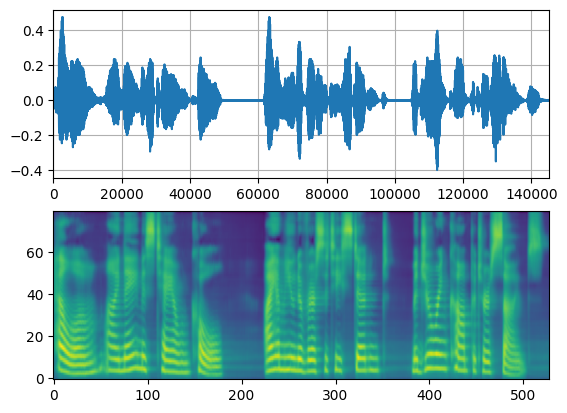

In [21]:
def plot(waveforms, spec, sample_rate):
    waveforms = waveforms.cpu().detach()

    fig, [ax1, ax2] = plt.subplots(2, 1)
    ax1.plot(waveforms[0])
    ax1.set_xlim(0, waveforms.size(-1))
    ax1.grid(True)
    ax2.imshow(spec[0].cpu().detach(), origin="lower", aspect="auto")
    return IPython.display.Audio(waveforms[0:1], rate=sample_rate)


plot(waveforms, spec, vocoder.sample_rate)

Griffin-Lim Vocoder

In [22]:
bundle = torchaudio.pipelines.TACOTRON2_GRIFFINLIM_PHONE_LJSPEECH

processor = bundle.get_text_processor()
tacotron2 = bundle.get_tacotron2().to(device)
vocoder = bundle.get_vocoder().to(device)

with torch.inference_mode():
    processed, lengths = processor(text)
    processed = processed.to(device)
    lengths = lengths.to(device)
    spec, spec_lengths, _ = tacotron2.infer(processed, lengths)
waveforms, lengths = vocoder(spec, spec_lengths)

Downloading: "https://download.pytorch.org/torchaudio/models/tacotron2_english_phonemes_1500_epochs_ljspeech.pth" to /root/.cache/torch/hub/checkpoints/tacotron2_english_phonemes_1500_epochs_ljspeech.pth


100%|██████████| 107M/107M [00:00<00:00, 407MB/s] 


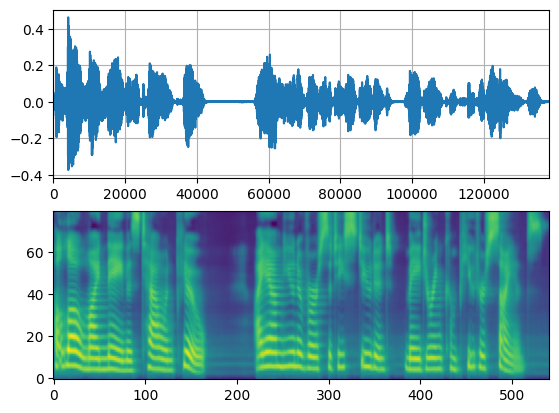

In [23]:
plot(waveforms, spec, vocoder.sample_rate)

Waveglow Vocoder

In [24]:
# Workaround to load model mapped on GPU
# https://stackoverflow.com/a/61840832
waveglow = torch.hub.load(
    "NVIDIA/DeepLearningExamples:torchhub",
    "nvidia_waveglow",
    model_math="fp32",
    pretrained=False,
)
checkpoint = torch.hub.load_state_dict_from_url(
    "https://api.ngc.nvidia.com/v2/models/nvidia/waveglowpyt_fp32/versions/1/files/nvidia_waveglowpyt_fp32_20190306.pth",  # noqa: E501
    progress=False,
    map_location=device,
)
state_dict = {key.replace("module.", ""): value for key, value in checkpoint["state_dict"].items()}

waveglow.load_state_dict(state_dict)
waveglow = waveglow.remove_weightnorm(waveglow)
waveglow = waveglow.to(device)
waveglow.eval()

with torch.no_grad():
    waveforms = waveglow.infer(spec)

/usr/local/lib/python3.12/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(


Downloading: "https://github.com/NVIDIA/DeepLearningExamples/zipball/torchhub" to /root/.cache/torch/hub/torchhub.zip


/root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub/PyTorch/Classification/ConvNets/image_classification/models/common.py:13: UserWarning: pytorch_quantization module not found, quantization will not be available
  warnings.warn(
/root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub/PyTorch/Classification/ConvNets/image_classification/models/efficientnet.py:17: UserWarning: pytorch_quantization module not found, quantization will not be available
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/utils/weight_norm.py:144: FutureWarning: `torch.nn.utils.weight_norm` is deprecated in favor of `torch.nn.utils.parametrizations.weight_norm`.
  WeightNorm.apply(module, name, dim)


Downloading: "https://api.ngc.nvidia.com/v2/models/nvidia/waveglowpyt_fp32/versions/1/files/nvidia_waveglowpyt_fp32_20190306.pth" to /root/.cache/torch/hub/checkpoints/nvidia_waveglowpyt_fp32_20190306.pth


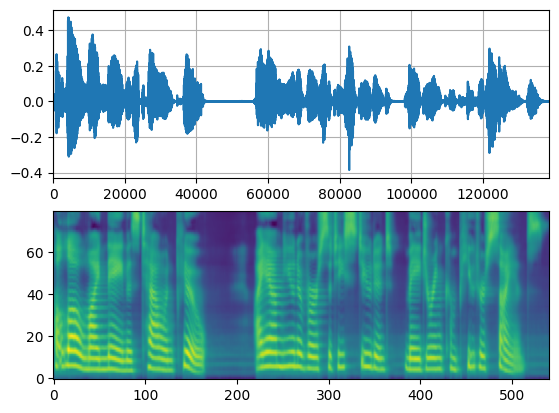

In [25]:
plot(waveforms, spec, 22050)